# 10. Working with Unlabeled Data - Clustering Analysis

In [62]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

mpl.style.use("ggplot")


Cluster data generation

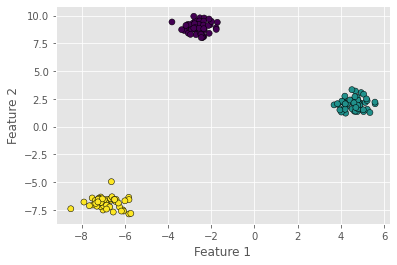

In [63]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=42,
)


def plot_cluster(X, y):

    plt.scatter(X[:, 0], X[:, 1], c=y, marker="o", edgecolors="black")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plot_cluster(X, y)


- Using kmeans from scikitlean
- Kmeans stops early in case of convergence
- Needs scaling for real world data when Euclidean metric is used

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=30, tol=1e-04, random_state=42)

# 

kmeans.fit(X, y)
labels = kmeans.predict(X)
labels


array([0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1,
       2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2,
       1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1,
       1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2], dtype=int32)

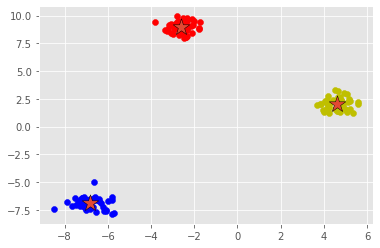

In [67]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], c="r")
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c="b")
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], c="y")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, edgecolors="black", marker="*")


plt.show()


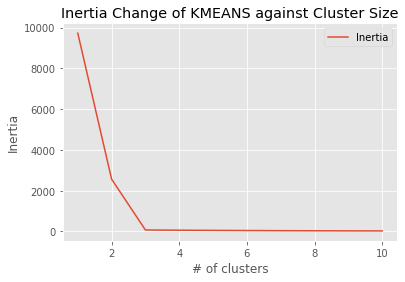

In [81]:
n_clusters = list(range(1,11))
rss = []

for k in n_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42)
    kmeans.fit(X, y)
    rss.append(kmeans.inertia_)


plt.plot(n_clusters, rss, label="Inertia")
plt.xlabel("# of clusters")
plt.ylabel("Inertia")
plt.title("Inertia Change of KMEANS against Cluster Size")
plt.legend()
plt.show()

# Hierarchical Clustering

In [107]:
from scipy.cluster.hierarchy import linkage, dendrogram

X = np.zeros((4,4))
print(X)
linkage(X, method="single", metric="euclidean")

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


/tmp/ipykernel_17393/941053265.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage(X, method="single", metric="euclidean")


array([[0., 1., 0., 2.],
       [2., 4., 0., 3.],
       [3., 5., 0., 4.]])

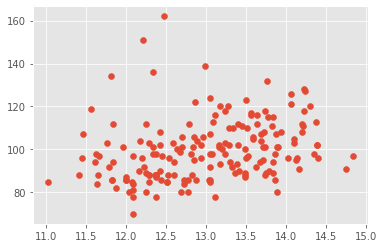

In [112]:
from sklearn.datasets import load_wine
import pandas as pd
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
plt.scatter(x="alcohol", y="magnesium", data=df)

In [123]:
df.corr().values

array([[ 1.        ,  0.09439694,  0.2115446 , -0.31023514,  0.27079823,
         0.28910112,  0.23681493, -0.15592947,  0.13669791,  0.5463642 ,
        -0.0717472 ,  0.07234319,  0.64372004],
       [ 0.09439694,  1.        ,  0.16404547,  0.2885004 , -0.0545751 ,
        -0.335167  , -0.41100659,  0.29297713, -0.22074619,  0.24898534,
        -0.56129569, -0.36871043, -0.19201056],
       [ 0.2115446 ,  0.16404547,  1.        ,  0.44336719,  0.28658669,
         0.12897954,  0.11507728,  0.18623045,  0.00965194,  0.25888726,
        -0.07466689,  0.00391123,  0.22362626],
       [-0.31023514,  0.2885004 ,  0.44336719,  1.        , -0.08333309,
        -0.32111332, -0.35136986,  0.36192172, -0.19732684,  0.01873198,
        -0.27395522, -0.27676855, -0.44059693],
       [ 0.27079823, -0.0545751 ,  0.28658669, -0.08333309,  1.        ,
         0.21440123,  0.19578377, -0.25629405,  0.23644061,  0.19995001,
         0.0553982 ,  0.06600394,  0.39335085],
       [ 0.28910112, -0.335167